In [1]:
import numpy as np
import os
from matplotlib import pyplot
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
from contextlib import redirect_stdout
import pandas as pd

In [6]:
plt.rcParams.update({'font.size': 22})
plt.rcParams["text.usetex"] = False
plt.rcParams["font.family"] = "sans-serif"

In [3]:
def Read_Two_Column_File(file_name):
    with open(file_name, 'r') as data:
        x = []
        y = []
        for line in data:
            p = line.split()
            x.append(float(p[0]))
            y.append(float(p[1]))

    return x, y

class alchemical_data:
    
    def __init__(self, path, corrections, time, sim_type, dihe_corr):
    #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/many_lambdas/1ns-equil_charge1.txt')
    #lj_times, lj_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_lj1.txt')
    #cl_times, cl_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_CL1.txt')
        #self.free_energies = None
        self.dihe_corr = dihe_corr
        self.time = time
        self.sim_type = sim_type 
        nFiles = 4 #always assumes 4 replicas
        nFields = 2
        data = np.zeros((nFiles,nFields))
        dataList = []
        
        
        #assumes all data is same length
        for i in range(1,nFiles+1):
            self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
            self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
            self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')

       
        #if self.time == 1:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/many_lambdas/1ns-equil_charge1.txt')
        #if self.time == 2:
        #    es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/LYS/10mm/opt_lambdas_run2/2ns-equil_lj1.txt')
        #if self.time == 5:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/5ns-equil_charge1.txt')
        #if self.time == 10:
            #es_times, es_energies = Read_Two_Column_File('/Users/bdneff/100ns_sims/GAFF/10mm_CL/10ns-equil_charge1.txt')
            
        
        if self.sim_type == 'CL':
            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')

                tmp = [self.es_energies, self.lj_energies, self.cl_energies]

                dataList.append(tmp)

            self.free_energies = []
            for i, ele in enumerate(dataList):
                tmp = np.add(ele[0],ele[1])
                tmp2 = np.add(tmp, corrections[i])
                fe_eng = np.subtract(tmp2, ele[2])
                self.free_energies.append(-1 * fe_eng)
                
        if self.sim_type == 'none':
            nFiles = 4
            nFields = 2
            data = np.zeros((nFiles,nFields))
            dataList = []

            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                tmp = [self.es_energies, self.lj_energies]

                dataList.append(tmp)


            self.free_energies = []
            for i, ele in enumerate(dataList):
                #print(ele[0])
                #print(ele[1])
                tmp = np.add(ele[0],ele[1])
                self.free_energies.append(-1 * tmp)
                
        if self.sim_type == 'dihe':
            nFiles = 4
            nFields = 2
            data = np.zeros((nFiles,nFields))
            dataList = []

            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                tmp = [self.es_energies, self.lj_energies]
                tmp_dihe = dihe_corr[i-1]
                dataList.append(tmp)
            
            self.free_energies = []
            for i, ele in enumerate(dataList):
                tmp = np.add(ele[0],ele[1])
                self.free_energies.append(-1 * tmp - dihe_corr[i])
        
        if self.sim_type == 'ALL':
            for i in range(1,nFiles+1):
                self.es_times, self.es_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_charge{i}.txt')
                self.lj_times, self.lj_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_lj{i}.txt')
                self.cl_times, self.cl_energies = Read_Two_Column_File(f'{path}/{time}ns-equil_CL{i}.txt')
                self.corrections = corrections
                tmp_dihe = dihe_corr[i-1]
                tmp = [self.es_energies, self.lj_energies, self.cl_energies]

                dataList.append(tmp)
                
            self.free_energies = []
            self.ljs = []
            self.cls = []
            self.ess = []
            for i, ele in enumerate(dataList):
                #tmp = np.add(ele[0],ele[1])
                #tmp2 = np.add(tmp, corrections[i])
                #fe_eng = np.subtract(tmp2, ele[2])
                #self.free_energies.append(-1 * fe_eng - dihe_corr)
                self.ess.append(ele[0])
                self.ljs.append(ele[1])
                self.cls.append(ele[2])
                
                tmp = np.add(ele[0][-1],ele[1][-1])
                tmp2 = np.add(tmp, corrections[i])
                fe_eng = np.subtract(tmp2, ele[2][-1])
                #self.free_energies.append(-1 * fe_eng - dihe_corr)
                if len(ele[0]) == len(ele[1]):
                    tmp = np.add(ele[0],ele[1])
                    tmp2 = np.add(tmp, corrections[i])
                    fe_eng = np.subtract(tmp2, ele[2])
                    self.free_energies.append(-1 * fe_eng - dihe_corr[i])
                
                else:
                    print("cannot calculate free energy convergence for steps of different length")
    
    def get_FEs(self):
        print("free energy predicitions using max time for each step:")
        print(self.free_energies)

    

    def plot_all(self):
        #plt.title(f'Predicted binding free energy from {self.sim_type}')
        plt.xlabel('times (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(-60, -10)
        for ele in self.free_energies:
            plt.plot(np.divide(self.lj_times,1000), ele, color = '#0000FF', alpha = 0.3)
        #plt.savefig(f'/Users/bdneff/Desktop/{self.time}ns_{self.sim_type}_all')


    def plot_average(self, ori_color = 'blue', windows = 'set_windows'):
        for ele in self.free_energies:
            #print(ele)
            plt.plot(np.divide(self.lj_times,1000)[:-1] , ele[1:], color = ori_color, alpha = 0.2)
        #plt.title(f'Predicted binding free energy from {self.sim_type}')
        plt.xlabel('times (ns)')
        plt.ylabel('∆G (kJ/mol)')
        #plt.ylim(-60, -10)
        #print(self.free_energies)
        ys = np.mean(self.free_energies, axis=0)
        print(ys[-1])
        stds = np.std(self.free_energies,axis=0)
        plt.errorbar(np.divide(self.lj_times,1000)[:-1],ys[1:],stds[1:], label = str('average prediction ' + str(windows)),color = ori_color, capsize = 10)
        #print(stds)
        #plt.plot(self.es_times,ys)
        #plt.savefig(f'/Users/bdneff/Desktop/{self.time}ns_{self.sim_type}_average')
    #print(free_energies)
    
    def plot_lj(self, ori_color = 'blue', windows = 'set_windows'):
        for ele in self.ljs:
            plt.plot(np.divide(self.lj_times,1000) , ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(0, 50)
        #print(self.ljs)
        #print(self.lj_times)
        ys = np.mean(self.ljs, axis=0)
        stds = np.std(self.ljs,axis=0)
        plt.errorbar(np.divide(self.lj_times,1000),ys,stds, label = str(str(windows) + ' steps'), color=ori_color)
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        
    def plot_CL(self, ori_color='blue', windows = 'set_windows'):
        for ele in self.cls:
            plt.plot(np.divide(self.cl_times,1000), ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(-50, 0)
        #print(self.free_energies)
        ys = np.mean(self.cls, axis=0)
        stds = np.std(self.cls,axis=0)
        plt.errorbar(np.divide(self.cl_times,1000),ys, stds, color = ori_color, label = str(str(windows) + ' steps'))
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        
    def plot_es(self, ori_color='blue', windows = 'set_windows'):
        for ele in self.ess:
            plt.plot(np.divide(self.es_times,1000), ele, color = ori_color, alpha = 0.2)
        plt.xlabel('time (ns)')
        plt.ylabel('∆G (kJ/mol)')
        plt.ylim(0, 50)
        #print(self.free_energies)
        ys = np.mean(self.ess, axis=0)
        stds = np.std(self.ess,axis=0)
        plt.errorbar(np.divide(self.es_times,1000),ys, stds, color = ori_color, label = str(str(windows) + ' steps' ))
        plt.plot(np.divide(self.es_times,1000),stds, color = ori_color)
        #print(stds)
        

In [7]:


def ave_list(lst):
    average_list = [sum(elem)/len(elem) for elem in zip(*lst)]
    std_dev_list = [np.std(elem) for elem in zip(*lst)]
    
    # Calculate the standard error of the mean (SEM) for each component
    #gaussian_error = [std_dev / np.sqrt(len(elem)) for std_dev, elem in zip(std_dev_list, zip(*lst))]
    
    return np.array(average_list), np.array(std_dev_list)

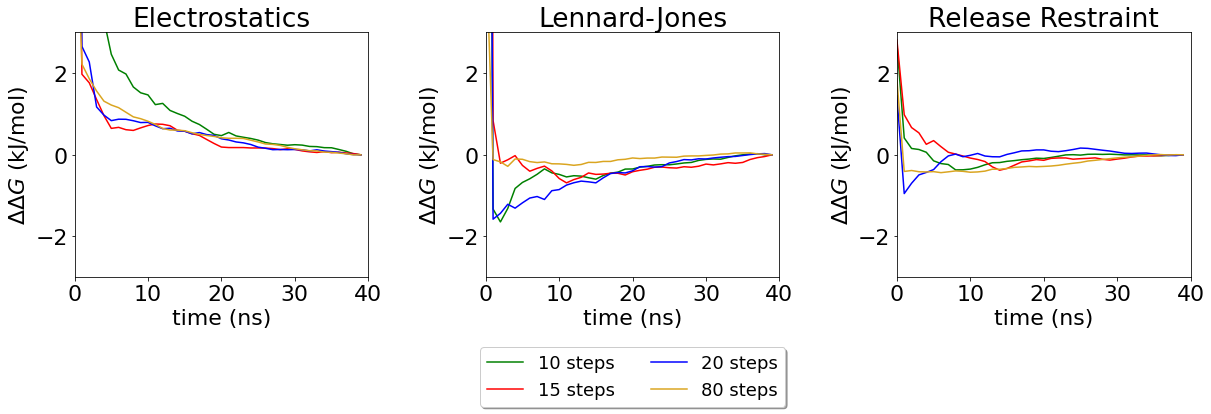

In [8]:
long_equil = alchemical_data('../data/FE_Results/DRG+LYS/twenty/gold_stand_same_struct/',[-29.8364, -29.8364, -29.8364, -29.8364], '5', 'ALL', [5.33595,5.33595,5.33595,5.33595])
short_equil = alchemical_data('../data/FE_Results/DRG+LYS/twenty/gold_stand_same_struct/',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL',[5.33595,5.33595,5.33595,5.33595])
opt2_sys = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas2/',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [5.33595,5.33595,5.33595,5.33595])

just_31_es = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas4',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL',[5.33595,5.33595,5.33595,5.33595])
just_61_es = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas6',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [5.33595,5.33595,5.33595,5.33595])
just_41_es = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas5',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [5.33595,5.33595,5.33595,5.33595])
opt_guess = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [5.33595,5.33595,5.33595,5.33595])
opt_3 = alchemical_data('../data/FE_Results/DRG+LYS/twenty/opt_lambdas3',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL',[5.33595,5.33595,5.33595,5.33595])
#drg_arg_def = alchemical_data('/Users/bdneff/Desktop/MT_Results/DRG+ARG/def_protocol', [-30.5379, -30.5379, -30.5379, -30.5379], '1', 'ALL', 0)

sys_es = opt_guess.ess, opt_3.ess, opt2_sys.ess, short_equil.ess
sys_lj = opt_guess.ljs, opt_3.ljs, opt2_sys.ljs, short_equil.ljs
sys_cl = opt_guess.cls, opt_3.cls, opt2_sys.cls, short_equil.cls
["10","15","20","80"]
    
ave_err_es = []
ave_err_lj = []
ave_err_cl = []
for i,sys in enumerate(sys_es):
    ave_err_es.append(ave_list(sys))
    
for i,sys in enumerate(sys_lj):
    ave_err_lj.append(ave_list(sys))
    
for i,sys in enumerate(sys_cl):
    ave_err_cl.append(ave_list(sys))
    
ave_err_es = np.array(ave_err_es, dtype=object)
ave_err_lj = np.array(ave_err_lj, dtype=object)
ave_err_cl = np.array(ave_err_cl, dtype=object)


# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 5))
datasets = [ave_err_es[:,0], ave_err_lj[:,0], ave_err_cl[:,0]]
titles = ["Electrostatics", "Lennard-Jones", "Release Restraint"]
labels = ["10 steps", "15 steps", "20 steps", "80 steps"]
colors = ['green', 'red', 'blue', 'goldenrod']

# Plotting loop
for ax, data, title in zip(axes, datasets, titles):
    for i, ave_series in enumerate(data):
        label = labels[i]  # Get the corresponding label for each line
        color = colors[i]
        dev_from_av = ave_series - ave_series[-1]
        ax.plot(dev_from_av, label=label, color=color)  # Apply the label here
    ax.set_ylim(-3, 3)
    ax.set_xlim(0, 40)
    ax.set_title(title)
    ax.set_ylabel('$\Delta \Delta G$ (kJ/mol)')
    ax.set_xlabel('time (ns)')
    # Move the legend statement inside the loop to add legends to all subplots
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=2, fontsize=18)

# Adjust subplot layout and legend
plt.subplots_adjust(bottom=0.2, wspace=0.4)
# Save the figure
# plt.savefig('/path/to/save/your/figure/stds_4x4.png', bbox_inches='tight', dpi=250)


In [9]:
#no restraints
no_restsLYS200 = alchemical_data('../data/FE_Results/DRG+LYS/twenty/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsLYS10 = alchemical_data('../data/FE_Results/DRG+LYS/ten/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsARG200 = alchemical_data('../data/FE_Results/DRG+ARG/twenty/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])
no_restsARG10 = alchemical_data('../data/FE_Results/DRG+ARG/ten/no_rests',[0,0,0,0], '1', 'ALL',[0,0,0,0])

#only orientational restraints
no_diheLYS10 = alchemical_data('../data/FE_Results/DRG+LYS/ten/no_dihe',[-29.0045, -29.0045, -29.0045, -29.0045], '1', 'ALL', [0,0,0,0])
no_dihe_LYS200 = alchemical_data('../data/FE_Results/DRG+LYS/twenty/no_dihe',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL', [0,0,0,0])
no_diheARG200 = alchemical_data('../data/FE_Results/DRG+ARG/twenty/no_dihe',[-30.5379, -30.5379, -30.5379, -30.5379], '1', 'ALL',[0,0,0,0])
no_diheARG10 = alchemical_data('../data/FE_Results/DRG+ARG/ten/no_dihe',[-30.5236, -30.5236, -30.5236, -30.5236], '1', 'ALL',[0,0,0,0])

#def_protocols
DRG_LYS_10mM = alchemical_data('../data/FE_Results/DRG+LYS/ten/def_protocol',[-29.0045, -29.0045, -29.0045, -29.0045], '1', 'ALL', [3.974402512319225, 4.425310840979413, 3.7633933812894935, 4.3005468946200605])
DRG_LYS_200mM = alchemical_data('../data/FE_Results/DRG+LYS/twenty',[-29.8364, -29.8364, -29.8364, -29.8364], '1', 'ALL',[3.8960583670449327, 4.567838179168744, 3.599721993966759, 2.889830739317668])
DRG_ARG_10mM = alchemical_data('../data/FE_Results/DRG+ARG/ten',[-30.5236, -30.5236, -30.5236, -30.5236], '1', 'ALL', [1.1963061036499163, 1.1859748197739137, 0.8134746475839688, 0.757318376865624])
DRG_ARG_200mM = alchemical_data('../data/FE_Results/DRG+ARG/twenty',[-30.5379, -30.5379, -30.5379, -30.5379], '1', 'ALL',[1.5056585410942844, 1.2610695009308008, 1.2204398477167515, 1.6308665258664257])



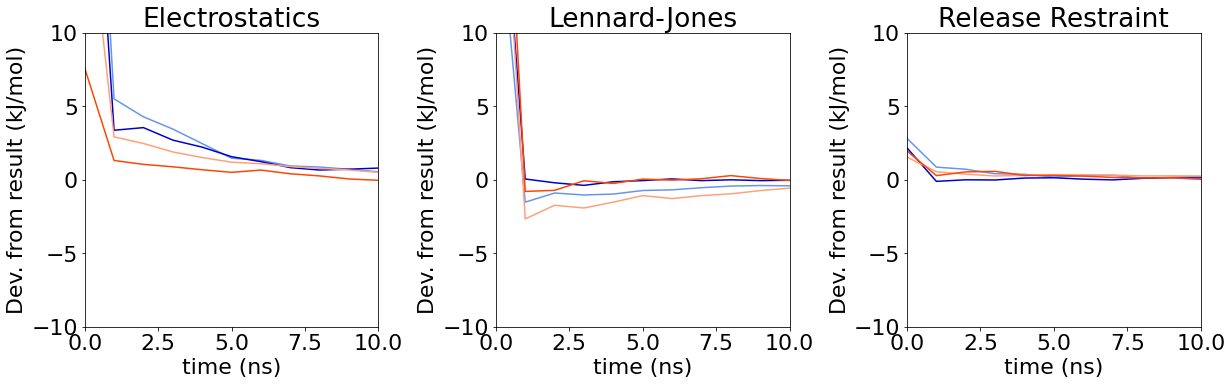

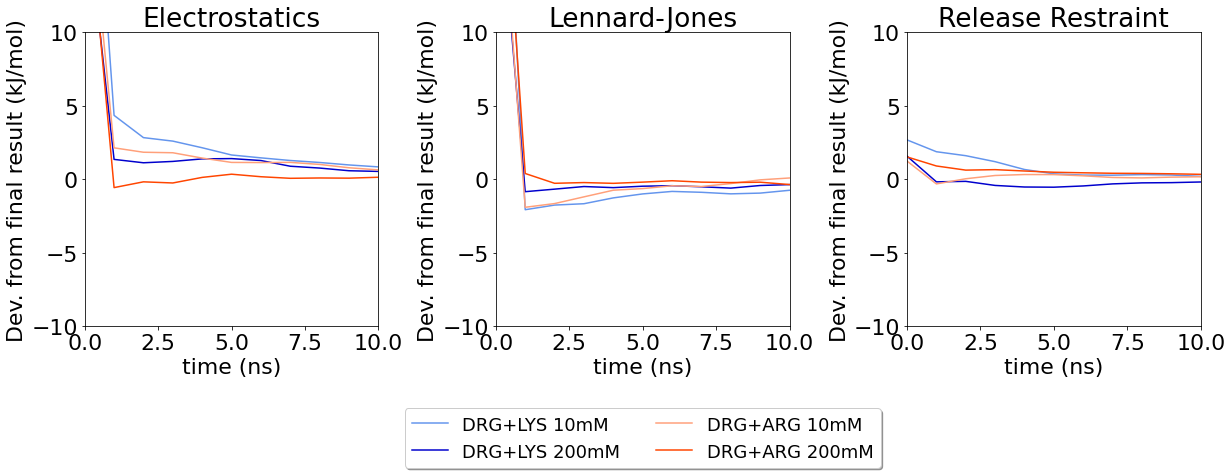

In [10]:


sys_es = no_diheLYS10.ess, no_dihe_LYS200.ess, no_diheARG10.ess, no_diheARG200.ess
sys_lj = no_diheLYS10.ljs, no_dihe_LYS200.ljs, no_diheARG10.ljs, no_diheARG200.ljs
sys_cl = no_diheLYS10.cls, no_dihe_LYS200.cls, no_diheARG10.cls, no_diheARG200.cls


ave_err_es = []
ave_err_lj = []
ave_err_cl = []
for i,sys in enumerate(sys_es):
    ave_err_es.append(ave_list(sys))
    
for i,sys in enumerate(sys_lj):
    ave_err_lj.append(ave_list(sys))
    
for i,sys in enumerate(sys_cl):
    ave_err_cl.append(ave_list(sys))
    
ave_err_es = np.array(ave_err_es, dtype=object)
ave_err_lj = np.array(ave_err_lj, dtype=object)
ave_err_cl = np.array(ave_err_cl, dtype=object)



# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
datasets = [ave_err_es[:,0], ave_err_lj[:,0], ave_err_cl[:,0]]
titles = ["Electrostatics", "Lennard-Jones", "Release Restraint"]
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]
colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
# Plotting loop
for ax, data, title in zip(axes, datasets, titles):
    for i, ave_series in enumerate(data):
        label = labels[i]  # Get the corresponding label for each line
        color = colors[i]
        dev_from_av = ave_series - ave_series[-1]
        ax.plot(dev_from_av, label=label, color=color)  # Apply the label here
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 10)
    ax.set_title(title)
    ax.set_ylabel('Dev. from result (kJ/mol)')
    ax.set_xlabel('time (ns)')
    # Move the legend statement inside the loop to add legends to all subplots
#axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=2, fontsize=18)

# Adjust subplot layout and legend
plt.subplots_adjust(bottom=0.2, wspace=0.4)
# Save the figure
# plt.savefig('/path/to/save/your/figure/stds_4x4.png', bbox_inches='tight', dpi=250)


sys_es = DRG_LYS_10mM.ess, DRG_LYS_200mM.ess, DRG_ARG_10mM.ess, DRG_ARG_200mM.ess
sys_lj = DRG_LYS_10mM.ljs, DRG_LYS_200mM.ljs, DRG_ARG_10mM.ljs, DRG_ARG_200mM.ljs
sys_cl = DRG_LYS_10mM.cls, DRG_LYS_200mM.cls, DRG_ARG_10mM.cls, DRG_ARG_200mM.cls


ave_err_es = []
ave_err_lj = []
ave_err_cl = []
for i,sys in enumerate(sys_es):
    ave_err_es.append(ave_list(sys))
    
for i,sys in enumerate(sys_lj):
    ave_err_lj.append(ave_list(sys))
    
for i,sys in enumerate(sys_cl):
    ave_err_cl.append(ave_list(sys))
    
ave_err_es = np.array(ave_err_es, dtype=object)
ave_err_lj = np.array(ave_err_lj, dtype=object)
ave_err_cl = np.array(ave_err_cl, dtype=object)

# Create the subplots
fig, axes = plt.subplots(1, 3, figsize=(20, 6))
datasets = [ave_err_es[:,0], ave_err_lj[:,0], ave_err_cl[:,0]]
titles = ["Electrostatics", "Lennard-Jones", "Release Restraint"]
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]
colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']

# Plotting loop
for ax, data, title in zip(axes, datasets, titles):
    for i, ave_series in enumerate(data):
        label = labels[i]  # Get the corresponding label for each line
        color = colors[i]
        dev_from_av = ave_series - ave_series[-1]
        ax.plot(dev_from_av, label=label, color=color)  # Apply the label here
    ax.set_ylim(-10, 10)
    ax.set_xlim(0, 10)
    ax.set_title(title)
    ax.set_ylabel('Dev. from final result (kJ/mol)')
    ax.set_xlabel('time (ns)')
    # Move the legend statement inside the loop to add legends to all subplots
axes[1].legend(loc='upper center', bbox_to_anchor=(0.5, -0.25), fancybox=True, shadow=True, ncol=2, fontsize=18)

# Adjust subplot layout and legend
plt.subplots_adjust(bottom=0.2, wspace=0.4)

# Save the figure
# plt.savefig('/path/to/save/your/figure/stds_4x4.png', bbox_inches='tight', dpi=250)

plt.show()

#on top without dihedral restraints
#on bottom with dihedral restraints

In [13]:
def time_to_minutes(time_str):
    if 'h' in time_str:
        parts = time_str.split('h')
        hours = int(parts[0])
        minutes = int(parts[1].split(':')[0])
    else:
        hours = 0
        minutes = int(time_str.split(':')[0])

    total_minutes = hours * 60 + minutes
    return total_minutes


with open('../data/benchmarking/times.txt', 'r') as data:
    all_time=[]
    for line in data:
        p = line.strip('\n')
        #print(p)
        all_time.append(time_to_minutes(p))

with open('../data/benchmarking/charge_times.txt', 'r') as data:
    charge_time=[]
    for line in data:
        p = line.strip('\n')
        #print(p)
        charge_time.append(time_to_minutes(p))
        
with open('../data/benchmarking/lj_times.txt', 'r') as data:
    lj_time=[]
    for line in data:
        p = line.strip('\n')
        #print(p)
        lj_time.append(time_to_minutes(p))
        
with open('../data/benchmarking/cl_times.txt', 'r') as data:
    cl_time=[]
    for line in data:
        p = line.strip('\n')
        #print(p)
        cl_time.append(time_to_minutes(p))
        
with open('../data/benchmarking/all_runs_collected_data.txt', 'r') as data:
    fe_time = []
    for line in data:
        p = line.strip('\n')
        fe_time.append(float(p)/60)

for i in range(len(lj_time)):
    if lj_time[i] < 70:
        lj_time[i] = lj_time[i] + 360
        
charge_hrs = np.mean(charge_time)/60 /40 * 16
lj_hrs = np.mean(lj_time)/60 / 40 * 21
rel_hrs = np.mean(cl_time)/60 / 40 * 21

#print(charge_hrs + lj_hrs + rel_hrs)

print(min(charge_time) / 60 / 40)
print(min(lj_time) /60 / 40)
print(min(cl_time) / 60 / 40)
print(min(fe_time) / 60 / 10)

charge_performance = min(charge_time) / 60 / 40
lj_performance = min(lj_time) /60 / 40
cl_performance = min(cl_time) /60 / 40
us_performance = min(fe_time) /60 / 10

0.042916666666666665
0.05708333333333333
0.026250000000000002
0.019758444444444443


[0.042916666666666665, 0.05708333333333333, 0.026250000000000002, 0.019758444444444443]


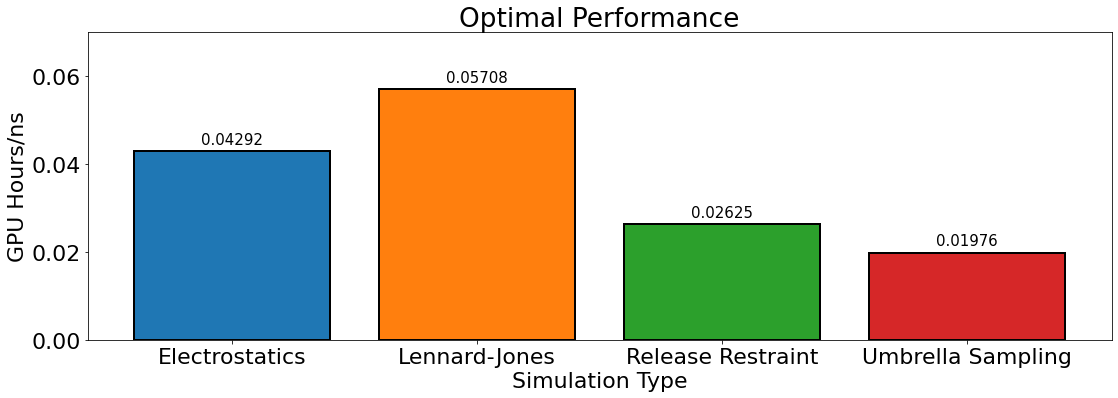

In [14]:
sim_types = ['Electrostatics','Lennard-Jones','Release Restraint','Umbrella Sampling']

runtimes = [charge_performance, lj_performance, cl_performance, us_performance]


print(runtimes)

# Generate the bar plot with labels on the bars
plt.figure(figsize=(16, 6))  # Set the figure size
bars = plt.bar(sim_types, runtimes, color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728'], alpha=1,  edgecolor = 'black' , linewidth = 2)  # Plot bars

# Title and labels
plt.title('Optimal Performance')
plt.ylabel('GPU Hours/ns')
plt.xlabel('Simulation Type')
plt.ylim(0,0.07)

# Ticks
# Grid
#plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding the text labels on the bars
consts = []
for bar in bars:
    yval = bar.get_height()
    consts.append(yval)
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001, round(yval, 5), ha='center', va='bottom', fontsize=15)

# Show the plot
plt.tight_layout()
plt.show()

In [15]:
def E(x, y, z):
    err = np.sqrt(x**2 + y**2 + z**2)
    return err

def dev(x, xres, y, yres, z, zres):
    return (xres - x)**2 + (yres - y)**2 + (zres - z)**2 

def calc_min_comp(dataframe, err_thresh, sys, type_e):
    if len(df.iloc[0]) == 8:
        filtered_rows = dataframe[dataframe.iloc[:, 3] <= err_thresh]
    if len(df.iloc[0]) == 10:
        filtered_rows = dataframe[dataframe.iloc[:, 4] <= err_thresh]
    sorted_filtered = filtered_rows.sort_values('Computational Expense')
    #print(sorted_filtered.iloc[0])
    
    #es = sorted_filtered.iloc[0][5]
    #lj = sorted_filtered.iloc[0][6]
    #cl = sorted_filtered.iloc[0][7]
    if type_e == 'e':
        output = sorted_filtered.iloc[0]["Computational Expense"]
        
    #    print('to achieve less than ' + str(err_thresh) + ' kJ error between 4 replicas for ' + str(sys) + ':\n'
    #          + str(es) + 'ns for electrostatics \n' + str(lj) + 'ns for lennard-jones \n'  +
    #          str(cl) + 'ns for release -restraint\n')
    if type_e == 'd':
    #    print('for results to converge within ' + str(err_thresh) + ' kJ with 4 replica calculations ' + str(sys) + ':\n'
    #          + str(es) + 'ns for electrostatics \n' + str(lj) + 'ns for lennard-jones \n'  +
    #          str(cl) + 'ns for release -restraint\n')
        output = sorted_filtered.iloc[0]["Computational Expense"]
    return output

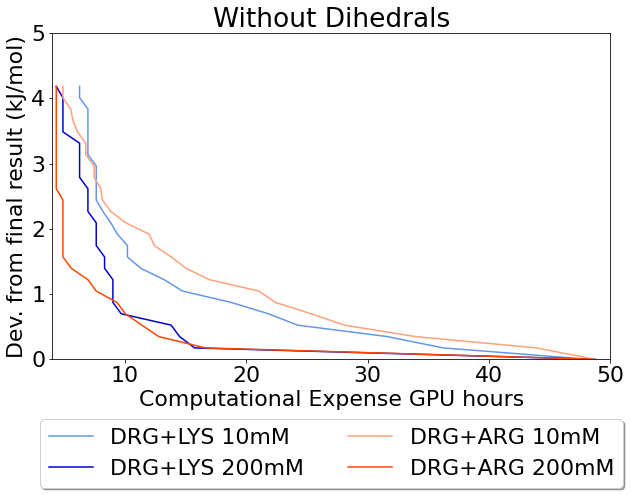

In [16]:
#number of windows * GPU hours/ns performance
consts = [16 * 0.042916666666666665, 21 * 0.05708333333333333, 21 * 0.026250000000000002, 64 * 0.019758444444444443 ] 

sys_es = no_diheLYS10.ess, no_dihe_LYS200.ess, no_diheARG10.ess, no_diheARG200.ess
sys_lj = no_diheLYS10.ljs, no_dihe_LYS200.ljs, no_diheARG10.ljs, no_diheARG200.ljs
sys_cl = no_diheLYS10.cls, no_dihe_LYS200.cls, no_diheARG10.cls, no_diheARG200.cls


ave_err_es = []
ave_err_lj = []
ave_err_cl = []
for i,sys in enumerate(sys_es):
    ave_err_es.append(ave_list(sys))
    
for i,sys in enumerate(sys_lj):
    ave_err_lj.append(ave_list(sys))
    
for i,sys in enumerate(sys_cl):
    ave_err_cl.append(ave_list(sys))
    
ave_err_es = np.array(ave_err_es, dtype=object)
ave_err_lj = np.array(ave_err_lj, dtype=object)
ave_err_cl = np.array(ave_err_cl, dtype=object)


accuracies = np.linspace(4.184, 0, 25)
acc_comp_exp = []
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]
for x in range(4):
    
    test1 = ave_err_es[x][0]
    test2 = ave_err_lj[x][0]
    test3 = ave_err_cl[x][0]

    table = []

    for i,ele1 in enumerate(test1):
        for j,ele2 in enumerate(test2):
            for k,ele3 in enumerate(test3):
                deviation = (test1[-1] - ele1)**2 + (test2[-1] - ele2)**2 + (test3[-1] - ele3)**2
                comp_time = ((i + 1) * consts[0]) + ((j + 1) * consts[1]) + ((k + 1) * consts[2])
                table.append((ele1,ele2,ele3, np.sqrt(deviation), comp_time, (i + 1) * consts[0] , (j + 1) * consts[1], (k + 1) * consts[2]))
        # Create the pandas DataFrame 
    df = pd.DataFrame(table, columns = ['D_es', 'D_lj', 'D_cl', 'D_tot', 'Computational Expense', 'ES_time', 'LJ_time', 'CL_time']) 

    # print dataframe. 
    #print(df)
    acc = []
    for val in accuracies:
        acc.append(calc_min_comp(df, val, labels[x], 'd'))
    #print(acc)
    acc_comp_exp.append(acc)

colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]

# Set the plot size
plt.figure(figsize=(10, 6))  # Width, height in inches

for i, ele in enumerate(acc_comp_exp):
    plt.plot(ele, accuracies, color=colors[i], label=labels[i])
    
#plt.plot(np.average(ele), np.average(accuracies))
plt.ylim(0, 5)
plt.xlim(4,50)
# Move legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.ylabel('Dev. from final result (kJ/mol)')  # Adjust label as needed
plt.xlabel('Computational Expense GPU hours')  # Adjust label as needed
plt.title('Without Dihedrals')  # Adjust title as needed
plt.savefig("error_wo_dihedrals.png")
plt.show()

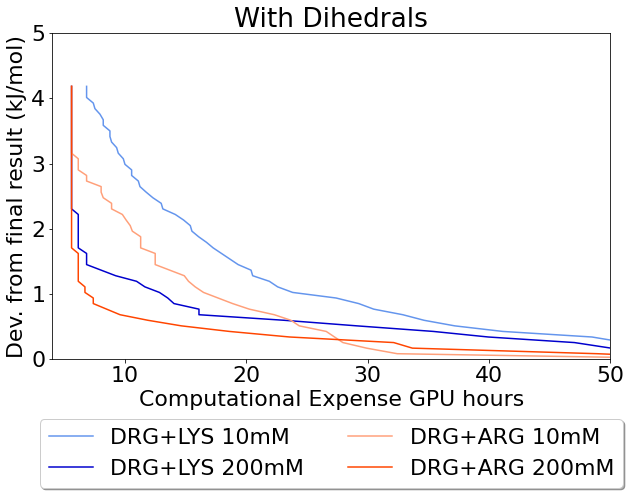

In [20]:
umbrella_ave_err = [[-4.71272097, -4.65330638, -4.62470197, -4.65940369, -4.68937052,
       -4.67092154, -4.67952265, -4.66208022, -4.63370518, -4.6710423 ,
       -4.69284539, -4.66939688, -4.67755309, -4.67279224, -4.61892268,
       -4.62165424, -4.63111158, -4.65450888, -4.61690984, -4.62034151,
       -4.61141333, -4.6794154 , -4.71701135, -4.69219955, -4.73451526,
       -4.77783802, -4.79740329, -4.75190619, -4.73473926, -4.65966104,
       -4.5667192 , -4.53972363, -4.53677989, -4.50683619, -4.4820109 ,
       -4.50550048, -4.6326869 , -4.6158403 , -4.61522723, -4.73685076,
       -4.87878748, -4.85914742, -5.0064443 , -4.94419361, -5.0329828 ,
       -5.43037123, -5.51938399, -5.63801219], 
 [-3.76337625, -3.75305922, -3.77447707, -3.75709853, -3.74605061,
        -3.72137727, -3.69095469, -3.68721567, -3.69459934, -3.70730879,
        -3.72964284, -3.7074064 , -3.67281421, -3.67273317, -3.6888685 ,
        -3.67813808, -3.68191348, -3.70578469, -3.74611276, -3.77116521,
        -3.74583785, -3.78543204, -3.79087231, -3.78519133, -3.8100313 ,
        -3.80744809, -3.79287905, -3.77394843, -3.72242663, -3.72483295,
        -3.7262185 , -3.72562515, -3.72050448, -3.72580937, -3.7660673 ,
        -3.82105235, -3.875516  , -3.95744395, -3.95706233, -3.9040313 ,
        -3.95685088, -3.92803245, -3.99951375, -3.88660133, -4.04855429,
        -4.00185752, -3.66131677, -3.65616972],
 [-1.01073305, -1.01218084, -1.01723444, -1.01711312, -1.00131185,
        -1.01277312, -1.02112262, -1.04268759, -1.05190471, -1.05136869,
        -1.05127362, -1.04179652, -1.04893528, -1.07035402, -1.08050825,
        -1.10950093, -1.11892973, -1.14175093, -1.16186729, -1.18749221,
        -1.20382585, -1.18846778, -1.19208692, -1.21092417, -1.23535556,
        -1.21592184, -1.21012039, -1.21054912, -1.20941533, -1.22287931,
        -1.23612809, -1.2388161 , -1.24482475, -1.22945478, -1.22806725,
        -1.22556197, -1.18757041, -1.19142489, -1.20230865, -1.17541365,
        -1.16988824, -1.14820568, -1.14874074, -1.11263611, -1.19094375,
        -1.18600252, -1.16276908, -1.24770639],
 [-1.41567029, -1.43330728, -1.43575053, -1.41857086, -1.42910686,
        -1.42950123, -1.43281864, -1.43256321, -1.42027019, -1.43928044,
        -1.46388406, -1.48000839, -1.48954015, -1.48578033, -1.49193355,
        -1.50555352, -1.48964382, -1.46386202, -1.44621189, -1.4364638 ,
        -1.43393678, -1.44335383, -1.42561008, -1.42755663, -1.44278695,
        -1.4463829 , -1.43154536, -1.43087564, -1.44052905, -1.42278301,
        -1.43854752, -1.41758173, -1.41386718, -1.42401357, -1.42105524,
        -1.40246814, -1.43424881, -1.45707512, -1.53182572, -1.55738172,
        -1.59017318, -1.68219776, -1.71937973, -1.71967575, -1.72541643,
        -1.59546483, -1.55441079, -1.43159509]]


sys_es = DRG_LYS_10mM.ess, DRG_LYS_200mM.ess, DRG_ARG_10mM.ess, DRG_ARG_200mM.ess
sys_lj = DRG_LYS_10mM.ljs, DRG_LYS_200mM.ljs, DRG_ARG_10mM.ljs, DRG_ARG_200mM.ljs
sys_cl = DRG_LYS_10mM.cls, DRG_LYS_200mM.cls, DRG_ARG_10mM.cls, DRG_ARG_200mM.cls



ave_err_es = []
ave_err_lj = []
ave_err_cl = []
for i,sys in enumerate(sys_es):
    ave_err_es.append(ave_list(sys))
    
for i,sys in enumerate(sys_lj):
    ave_err_lj.append(ave_list(sys))
    
for i,sys in enumerate(sys_cl):
    ave_err_cl.append(ave_list(sys))
    
ave_err_es = np.array(ave_err_es, dtype=object)
ave_err_lj = np.array(ave_err_lj, dtype=object)
ave_err_cl = np.array(ave_err_cl, dtype=object)


accuracies = np.linspace(4.184, 0, )
acc_comp_exp = []
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]
for x in range(4):
    
    test1 = ave_err_es[x][0]
    test2 = ave_err_lj[x][0]
    test3 = ave_err_cl[x][0]
    test4 = umbrella_ave_err[x][4::5]

    table = []

    for i,ele1 in enumerate(test1):
        for j,ele2 in enumerate(test2):
            for k,ele3 in enumerate(test3):
                for l, ele4 in enumerate(test4):
                    deviation = (ele1 - test1[-1])**2 + (ele2 - test2[-1])**2 + (ele3 - test3[-1])**2 + (ele4 - test4[-1])**2
                    comp_time = (i + 1) * consts[0] + (j + 1) * consts[1] + (k + 1) * consts[2] + (l + 1) * consts[3]
                    table.append((ele1, ele2, ele3, ele4, np.sqrt(deviation), comp_time,
                    (i + 1) * consts[0] , (j + 1) * consts[1], (k + 1) * consts[2], (l + 1) * consts[3]))
            # Create the pandas DataFrame 
    df = pd.DataFrame(table, columns = ['D_es', 'D_lj', 'D_cl', 'D_us', 'D_tot', 'Computational Expense', 'ES_time', 'LJ_time', 'CL_time', 'US_time']) 

    # print dataframe. 
    #print(df)
    acc = []
    for val in accuracies:
        acc.append(calc_min_comp(df, val, labels[x], 'd'))
    #print(acc)
    acc_comp_exp.append(acc)

colors = ['cornflowerblue', 'mediumblue', 'lightsalmon', 'orangered']
labels = ["DRG+LYS 10mM", "DRG+LYS 200mM", "DRG+ARG 10mM", "DRG+ARG 200mM"]

# Set the plot size
plt.figure(figsize=(10, 6))  # Width, height in inches

for i, ele in enumerate(acc_comp_exp):
    plt.plot(ele, accuracies, color=colors[i], label=labels[i])
plt.ylim(0.0, 5)
plt.xlim(4,50)
# Move legend below the plot
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), fancybox=True, shadow=True, ncol=2)

plt.ylabel('Dev. from final result (kJ/mol)')  # Adjust label as needed
plt.xlabel('Computational Expense GPU hours')  # Adjust label as needed
plt.title('With Dihedrals')  # Adjust title as needed
plt.savefig("error_w_dihes.png")
plt.show()

In [ ]:
!conda env export --no-builds > environment.yml
